In [19]:
import stim

circuit = stim.Circuit()

circuit.append("X", [4])
circuit.append("H", [0, 1, 2, 3, 4])
circuit.append("CNOT", [0, 4])
circuit.append("H", [0])
circuit.append("CNOT", [1, 4])
circuit.append("H", [1])
circuit.append("CNOT", [2, 4])
circuit.append("H", [2])
circuit.append("CNOT", [3, 4])
circuit.append("H", [3])
circuit.append("M", [0, 1, 2, 3])
# circuit.append("H", [0])
# circuit.append("CNOT", [0, 1])

# # Then, the circuit will measure both qubits of the Bell pair in the Z basis.
# circuit.append("M", [0, 1])


circuit.diagram()

q0: -H---@-H-----M:rec[0]----------
         |
q1: -H---|-@-H---M:rec[1]----------
         | |
q2: -H---|-|-@-H-M:rec[2]----------
         | | |
q3: -H---|-|-|-@-H--------M:rec[3]-
         | | | |
q4: -X-H-X-X-X-X-------------------

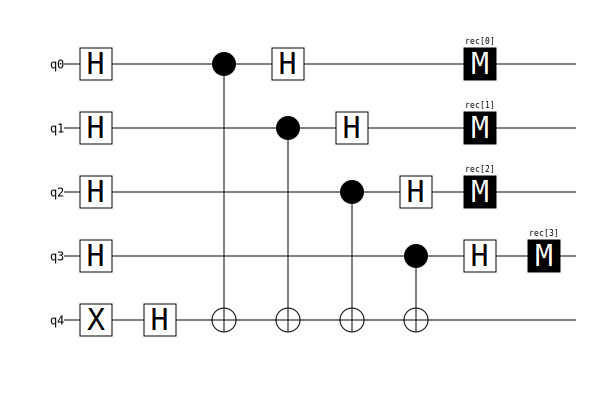

In [20]:
circuit.diagram('timeline-svg')

In [21]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [22]:
print(circuit)

X 4
H 0 1 2 3 4
CX 0 4
H 0
CX 1 4
H 1
CX 2 4
H 2
CX 3 4
H 3
M 0 1 2 3


In [23]:
test_circuit = stim.Circuit("""
    X 4
    H 0 1 2 3
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK
                        
    H 4
    CX 0 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK

    H 0
    CX 1 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK

    H 1
    CX 2 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK

    H 2
    CX 3 4
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK
    H 3
                            X_ERROR(0.2) 0 1 2 3 4
                            Z_ERROR(0.2) 0 1 2 3 4
    TICK
    M 0 1 2 3
    DETECTOR rec[-1] rec[-2]
""")

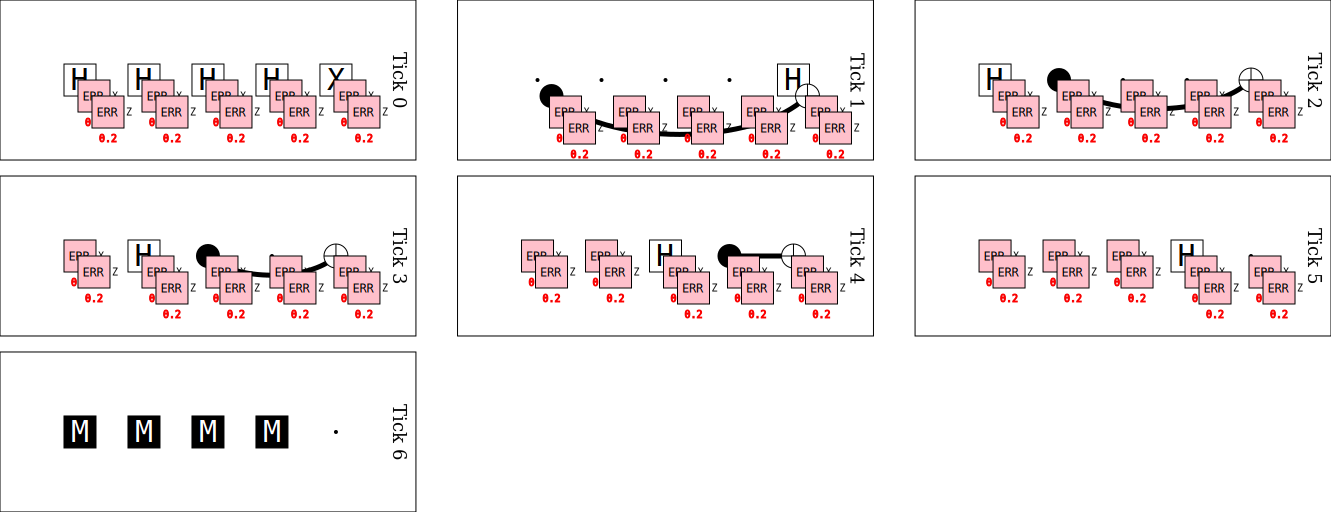

In [24]:
test_circuit.diagram('timeslice-svg')

In [25]:
sampler = test_circuit.compile_detector_sampler()
print(sampler.sample(shots=10))

[[ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]]


In [26]:
import numpy as np
print(np.sum(sampler.sample(shots=10**6)) / 10**6)

0.49964


In [27]:
def generate_bv_circuit(num_qubits):
    circuit = stim.Circuit()
    qubits = [i for i in range(num_qubits)]
    circuit.append("X", [num_qubits-1])
    circuit.append("H", qubits[:num_qubits])
    for i in range(num_qubits-1):
        circuit.append("CNOT", [i, num_qubits-1])
        circuit.append("H", [i])
    circuit.append("M", qubits[:num_qubits-1])
    return circuit


In [28]:
bv5_circuit = generate_bv_circuit(5)
bv5_circuit.diagram()

q0: -H---@-H-----M:rec[0]----------
         |
q1: -H---|-@-H---M:rec[1]----------
         | |
q2: -H---|-|-@-H-M:rec[2]----------
         | | |
q3: -H---|-|-|-@-H--------M:rec[3]-
         | | | |
q4: -X-H-X-X-X-X-------------------

In [29]:
def generate_bv_post_caqr(num_qubits):
    circuit = stim.Circuit()
    circuit.append("X", [num_qubits-1])
    circuit.append("H", [num_qubits-1])
    circuit.append("H", [0])
    for i in range(num_qubits-2):
        circuit.append("CNOT", [0, num_qubits-1])
        circuit.append("H", [0])
        circuit.append("MR", [0])
        circuit.append("H", [0])
    
    circuit.append("CNOT", [0, num_qubits-1])
    circuit.append("H", [0])
    circuit.append("M", [0])
    return circuit

def generate_bv_post_caqr_with_errors(num_qubits, x_error):
    circuit = stim.Circuit()
    qubits = [i for i in range(num_qubits)]
    circuit.append("X", [num_qubits-1])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    circuit.append("H", [num_qubits-1])
    circuit.append("H", [0])
    for i in range(num_qubits-2):
        circuit.append("CNOT", [0, num_qubits-1])
        circuit.append("H", [0])
        circuit.append("TICK")
        circuit.append("X_ERROR", qubits, arg=x_error)
        circuit.append("MR", [0])
        circuit.append("H", [0])
    circuit.append("CNOT", [0, num_qubits-1])
    circuit.append("H", [0])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    circuit.append("M", [0])
    return circuit

In [30]:
bv5_post_caqr_circuit = generate_bv_post_caqr(10)
bv5_post_caqr_circuit.diagram()

q0: ---H-@-H-MR:rec[0]-H-@-H-MR:rec[1]-H-@-H-MR:rec[2]-H-@-H-MR:rec[3]-H-@-H-MR:rec[4]-H-@-H-MR:rec[5]-H-@-H-MR:rec[6]-H-@-H-MR:rec[7]-H-@-H-M:rec[8]-
         |               |               |               |               |               |               |               |               |
q1: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q2: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q3: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q4: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q5: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q6: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q7: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q8: -----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|------------
         |               |               |               |               |               |               |               |               |
q9: -X-H-X---------------X---------------X---------------X---------------X---------------X---------------X---------------X---------------X------------

In [31]:
bv5_post_caqr_circuit_with_errors = generate_bv_post_caqr_with_errors(5, 0.1)
bv5_post_caqr_circuit_with_errors.diagram()

/----------------\ /--------------------------\ /--------------------------\ /--------------------------\ /-------------------\
q0: ---X_ERROR(0.1)-H-@-H-X_ERROR(0.1)-MR:rec[0]-H-@-H-X_ERROR(0.1)-MR:rec[1]-H-@-H-X_ERROR(0.1)-MR:rec[2]-H-@-H-X_ERROR(0.1)-M:rec[3]-
                      |                            |                            |                            |
q1: ---X_ERROR(0.1)---|---X_ERROR(0.1)-------------|---X_ERROR(0.1)-------------|---X_ERROR(0.1)-------------|---X_ERROR(0.1)----------
                      |                            |                            |                            |
q2: ---X_ERROR(0.1)---|---X_ERROR(0.1)-------------|---X_ERROR(0.1)-------------|---X_ERROR(0.1)-------------|---X_ERROR(0.1)----------
                      |                            |                            |                            |
q3: ---X_ERROR(0.1)---|---X_ERROR(0.1)-------------|---X_ERROR(0.1)-------------|---X_ERROR(0.1)-------------|---X_ERROR(0.1)----------
                      |                            |                            |                            |
q4: -X-X_ERROR(0.1)-H-X---X_ERROR(0.1)-------------X---X_ERROR(0.1)-------------X---X_ERROR(0.1)-------------X---X_ERROR(0.1)----------
       \----------------/ \--------------------------/ \--------------------------/ \--------------------------/ \-------------------/

In [32]:
def generate_bv_circuit_with_errors(num_qubits, x_error):
    circuit = stim.Circuit()
    qubits = [i for i in range(num_qubits)]
    circuit.append("X", [num_qubits-1])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    circuit.append("H", qubits[:num_qubits])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    for i in range(num_qubits-1):
        circuit.append("CNOT", [i, num_qubits-1])
        circuit.append("TICK")
        circuit.append("X_ERROR", qubits, arg=x_error)
        circuit.append("H", [i])
    circuit.append("TICK")
    circuit.append("X_ERROR", qubits, arg=x_error)
    circuit.append("M", qubits[:num_qubits-1])
    return circuit

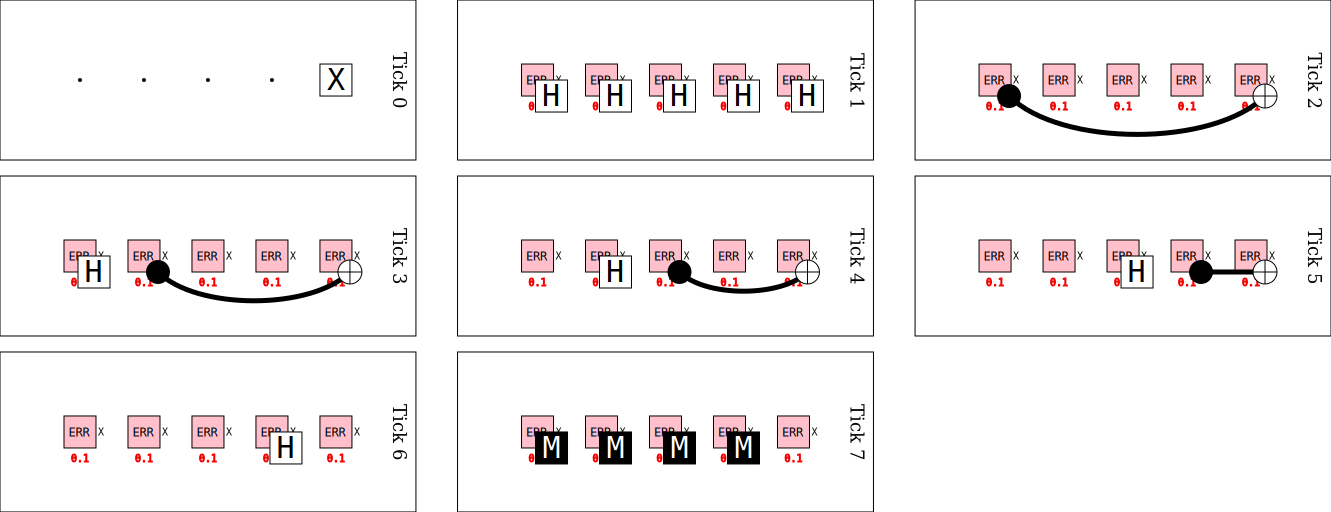

In [33]:
bv5_circuit_with_errors = generate_bv_circuit_with_errors(5, x_error=0.1)
bv5_circuit_with_errors.diagram('timeslice-svg')

In [56]:
bv5_circuit_with_errors = generate_bv_circuit_with_errors(5, x_error=0.1)
bv5_post_caqr_circuit_with_errors = generate_bv_post_caqr_with_errors(5, 0.1)

sampler = bv5_post_caqr_circuit_with_errors.compile_sampler()
shots = sampler.sample(shots=10)

for i, shot in enumerate(shots):
    bitstring = ''.join(str(int(bit)) for bit in shot)
    print(f"Shot {i}: {bitstring}")

shots_many = sampler.sample(shots=1000)
from collections import Counter

results = Counter()
for shot in shots_many:
    bitstring = ''.join(str(int(bit)) for bit in shot)
    results[bitstring] += 1

print("\n--- Most Common Results ---")
for bitstring, count in results.most_common(5):
    percentage = 100 * count / 1000
    print(f"{bitstring}: {count:4d} ({percentage:5.1f}%)")

Shot 0: 0011
Shot 1: 1111
Shot 2: 1111
Shot 3: 1111
Shot 4: 1110
Shot 5: 1111
Shot 6: 1011
Shot 7: 0111
Shot 8: 0111
Shot 9: 0010

--- Most Common Results ---
1111:  549 ( 54.9%)
0111:  135 ( 13.5%)
1011:   59 (  5.9%)
1101:   57 (  5.7%)
0000:   56 (  5.6%)


In [83]:
import matplotlib.pyplot as plt
from collections import Counter

sampler = bv5_circuit_with_errors.compile_sampler()
shots_many = sampler.sample(shots=1000)

results = Counter()
for shot in shots_many:
    bitstring = ''.join(str(int(bit)) for bit in shot)
    results[bitstring] += 1

top_results = results.most_common(10)[::-1]
bitstrings = [bs for bs, _ in top_results]
counts = [count for _, count in top_results]

percentages = [(count / 1000) * 100 for count in counts]

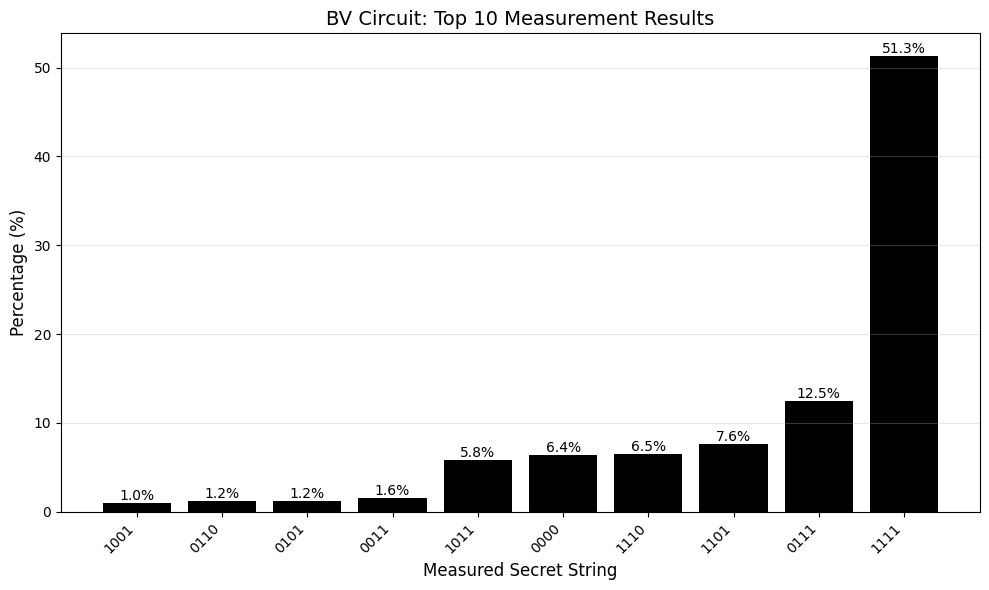

In [ ]:
def evaluate_circuit(circuit, shots=1000):
    sampler = circuit.compile_sampler()
    shots_many = sampler.sample(shots=shots)

    results = Counter()
    for shot in shots_many:
        bitstring = ''.join(str(int(bit)) for bit in shot)
        results[bitstring] += 1

    top_results = results.most_common(10)[::-1]
    return top_results

def plot_distribution(top_results):
    bitstrings = [bs for bs, _ in top_results]
    counts = [count for _, count in top_results]

    percentages = [(count / 1000) * 100 for count in counts]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(bitstrings)), percentages, color='black')
    plt.xlabel('Measured Secret String', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('BV Circuit: Top 10 Measurement Results', fontsize=14)
    plt.xticks(range(len(bitstrings)), bitstrings, rotation=45, ha='right')

    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

results = evaluate_circuit(bv5_circuit_with_errors, shots=1000)
plot_distribution(results)
